In [ ]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
def buildBranch(x):
  x = keras.layers.Conv2D(32,(3,3),activation='relu')(x)
  x = keras.layers.MaxPool2D(pool_size=(3,3))(x)
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(32,activation="relu")(x)
  x = keras.layers.Dense(16,activation="relu")(x)
  x = keras.layers.Dense(10,activation="softmax")(x)
  return x

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input

def buildBranch(x):
  x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
  x = Conv2D(filters=32, kernel_size=(5,5), activation='relu')(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.25)(x)

  x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
  x = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
  x = MaxPool2D(pool_size=(2, 2))(x)
  x = Dropout(rate=0.25)(x)

  x = Flatten()(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(rate=0.5)(x)
  x = Dense(10, activation='softmax')(x)
  return x

In [ ]:
inputs = keras.layers.Input(shape=(28,28,1))
branch = buildBranch(inputs)

model = keras.models.Model(inputs=inputs, outputs=branch, name="MNIST")
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
model.summary()

H = model.fit(x=X_train, y=Y_train, validation_data=(X_test,Y_test), epochs=50, steps_per_epoch=50, verbose=1)

Model: "MNIST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 64)          36928 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
net loss: 0.019 acc: 0.995


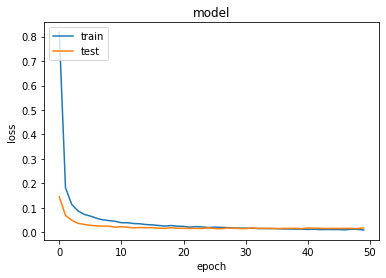

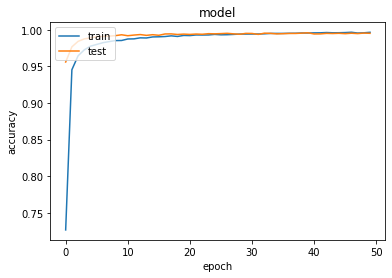

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
# print(score)
print(H.history.keys())
print("net loss: {:5.3f} acc: {:5.3f}".format(score[0],score[1]))

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()